<a href="https://colab.research.google.com/github/L0ki2026/Neural-Networks/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch
X = torch.tensor(([
    [30, 8],  # Temperature and sunny days for City A
    [25, 5],  # Temperature and sunny days for City B
    [28, 6],  # Temperature and sunny days for City C
    [32, 10]  # Temperature and sunny days for City D
]),dtype=torch.float)

y = torch.tensor(([200], [150], [180], [220]),dtype=torch.float)#ice cream sales for each city

xPredicted = torch.tensor(([27, 7]), dtype=torch.float)

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


In [ ]:
# scale units
X_max, _ = torch.max(X, 0)
xPredicted_max, _ = torch.max(xPredicted, 0)

X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100

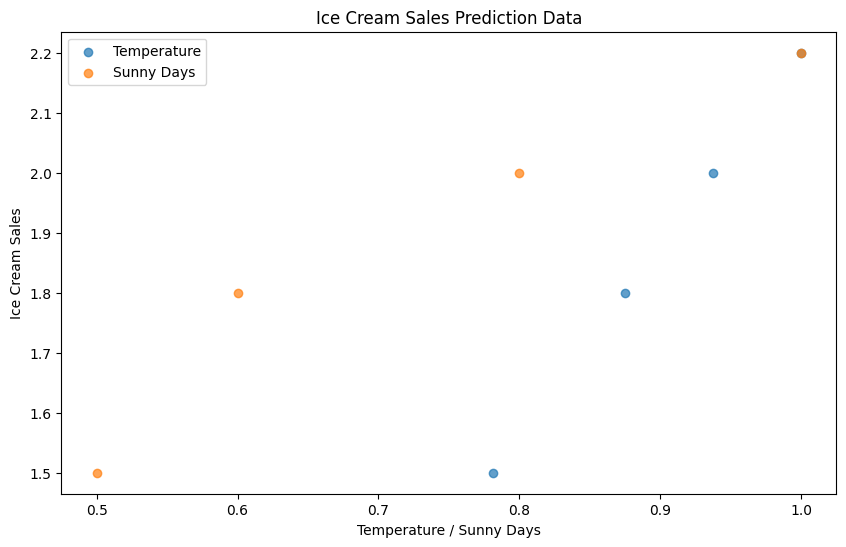

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], y, label='Temperature', alpha=0.7)
plt.scatter(X[:, 1], y, label='Sunny Days', alpha=0.7)

plt.title('Ice Cream Sales Prediction Data')
plt.xlabel('Temperature / Sunny Days')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

In [ ]:
import torch.nn as nn
import torch.optim as optim

class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 4

        # weights
        self.W1 = nn.Parameter(torch.randn(self.inputSize, self.hiddenSize))
        self.W2 = nn.Parameter(torch.randn(self.hiddenSize, self.outputSize))

    def forward(self, X):
        self.z = torch.matmul(X, self.W1)  # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = torch.relu(self.z)  # ReLU activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.z3
        return o

    def backward(self, X, y, o, optimizer):
        # calculate loss
        loss = torch.mean((y - o)**2)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss

    def train(self, X, y, epochs=100, learning_rate=0.01):
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # forward pass
            o = self.forward(X)

            # backward pass
            loss = self.backward(X, y, o, optimizer)

            # Optionally, you can print the loss for each epoch if needed
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.3f}")

    def predict(self, X):
        print("Predicted data based on trained weights: ")
        print("Input (scaled): \n" + str(X))
        print("Output: \n" + str(self.forward(X)))

# Assuming you have X and y defined
model = Neural_Network()
model.train(X, y, epochs=100, learning_rate=0.01)

Epoch 1/100, Loss: 2.519
Epoch 2/100, Loss: 1.854
Epoch 3/100, Loss: 1.362
Epoch 4/100, Loss: 1.001
Epoch 5/100, Loss: 0.752
Epoch 6/100, Loss: 0.564
Epoch 7/100, Loss: 0.422
Epoch 8/100, Loss: 0.320
Epoch 9/100, Loss: 0.242
Epoch 10/100, Loss: 0.184
Epoch 11/100, Loss: 0.140
Epoch 12/100, Loss: 0.108
Epoch 13/100, Loss: 0.083
Epoch 14/100, Loss: 0.065
Epoch 15/100, Loss: 0.052
Epoch 16/100, Loss: 0.042
Epoch 17/100, Loss: 0.034
Epoch 18/100, Loss: 0.029
Epoch 19/100, Loss: 0.025
Epoch 20/100, Loss: 0.022
Epoch 21/100, Loss: 0.020
Epoch 22/100, Loss: 0.018
Epoch 23/100, Loss: 0.017
Epoch 24/100, Loss: 0.016
Epoch 25/100, Loss: 0.015
Epoch 26/100, Loss: 0.015
Epoch 27/100, Loss: 0.015
Epoch 28/100, Loss: 0.014
Epoch 29/100, Loss: 0.014
Epoch 30/100, Loss: 0.014
Epoch 31/100, Loss: 0.014
Epoch 32/100, Loss: 0.014
Epoch 33/100, Loss: 0.014
Epoch 34/100, Loss: 0.014
Epoch 35/100, Loss: 0.014
Epoch 36/100, Loss: 0.014
Epoch 37/100, Loss: 0.014
Epoch 38/100, Loss: 0.014
Epoch 39/100, Loss: 0